### importing libraries

In [722]:
!pip install xgboost

In [723]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

### reading datasets

In [724]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [725]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### dataset info

In [726]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [727]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [728]:
train_df.describe(include= ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### survival on basis of class

In [729]:
train_df.groupby(['Pclass'], as_index=False) ['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### survival on basic of sex

In [730]:
train_df.groupby(['Sex'], as_index=False) ['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


### survival on basis of siblings & spouse

In [731]:
train_df.groupby(['SibSp'], as_index=False) ['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### suvival on  basis of parch

In [732]:
train_df.groupby(['Parch'], as_index=False) ['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


### combining no. of members in famiiy

In [733]:
train_df['Family Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family Size'] = test_df['SibSp'] + test_df['Parch'] + 1

### survival on basis of family size

In [734]:
train_df.groupby(['Family Size'], as_index=False) ['Survived'].mean()

,Family Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


### grouping family on basis of size

In [735]:
family_map ={1: 'Alone', 2: 'Small',3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large',}
train_df['Family Size Grouped'] = train_df['Family Size'].map(family_map)
test_df['Family Size Grouped'] = test_df['Family Size'].map(family_map)

### survival on basis of family size group

In [736]:
train_df.groupby(['Family Size Grouped'], as_index=False) ['Survived'].mean()

,Family Size Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


### survival on basis of embarking of journey

In [737]:
train_df.groupby(['Embarked'],as_index=False) ['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


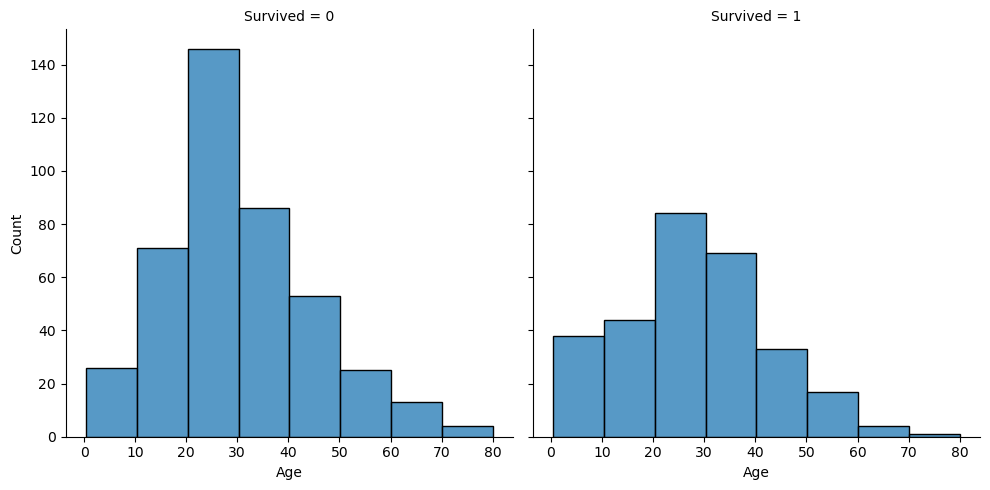

In [738]:
sns.displot(train_df, x='Age', col='Survived' , binwidth = 10, height=5)
plt.show()

In [739]:
train_df['Age Cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age Cut'] = pd.qcut(test_df['Age'], 8)

In [740]:
train_df.groupby(['Age Cut'], as_index= False)['Survived'].mean()

C:\Users\amana\AppData\Local\Temp\ipykernel_19508\3403498359.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age Cut'], as_index= False)['Survived'].mean()


,Age Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [741]:
train_df.loc[train_df['Age'] <= 19, 'Age'] = 0
train_df.loc[(train_df['Age'] > 19) & (train_df['Age'] <= 25), 'Age'] = 1
train_df.loc[(train_df['Age'] > 25) & (train_df['Age'] <= 31.8), 'Age'] = 2
train_df.loc[(train_df['Age'] > 31.8) & (train_df['Age'] <= 41), 'Age'] = 3
train_df.loc[(train_df['Age'] > 41) & (train_df['Age'] <= 80), 'Age'] = 4
train_df.loc[train_df['Age'] > 80, 'Age'] 

test_df.loc[test_df['Age'] <= 19, 'Age'] = 0
test_df.loc[(test_df['Age'] > 19) & (test_df['Age'] <= 25), 'Age'] = 1
test_df.loc[(test_df['Age'] > 25) & (test_df['Age'] <= 31.8), 'Age'] = 2
test_df.loc[(test_df['Age'] > 31.8) & (test_df['Age'] <= 41), 'Age'] = 3
test_df.loc[(test_df['Age'] > 41) & (test_df['Age'] <= 80), 'Age'] = 4
test_df.loc[test_df['Age'] > 80, 'Age']

Series([], Name: Age, dtype: float64)

In [742]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Family Size Grouped,Age Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


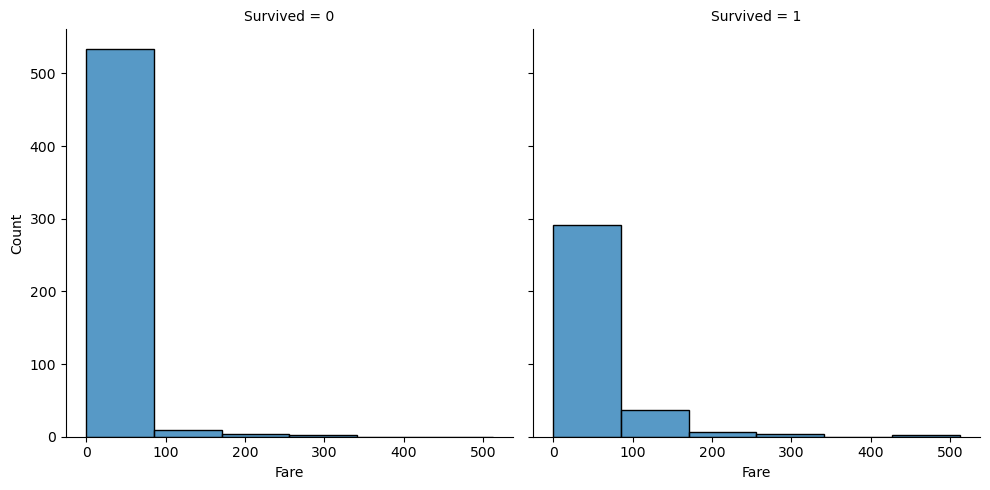

In [743]:
sns.displot(train_df, x='Fare' ,col='Survived', binwidth=80, height=5)
plt.show()

In [744]:
train_df['Fare cut'] = pd.qcut(train_df['Fare'] ,6)
test_df['Fare Cut'] = pd.qcut(test_df['Fare'], 6)

In [745]:
train_df.groupby(['Fare cut'], as_index= False) ['Survived'].mean()

C:\Users\amana\AppData\Local\Temp\ipykernel_19508\1828299877.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare cut'], as_index= False) ['Survived'].mean()


,Fare cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [746]:
train_df.loc[train_df['Fare'] <=  7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 26) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Fare'] = 5
train_df.loc[train_df['Fare'] > 512.329, 'Fare']

test_df.loc[test_df['Fare'] <=  7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 26) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Fare'] = 5
test_df.loc[test_df['Fare'] > 512.329, 'Fare']

343    512.3292
Name: Fare, dtype: float64

In [747]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [748]:
train_df['Name'].str.split(pat= ',',expand= True)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


In [749]:
train_df['Title'] = train_df['Name'].str.split(pat=',' ,expand= True)[1].str.split(pat= '.', expand=True)[0].apply(lambda x: x.strip())
train_df['Title'] = test_df['Name'].str.split(pat=',' ,expand= True)[1].str.split(pat= '.', expand=True)[0].apply(lambda x: x.strip())

In [750]:
train_df.groupby(['Title'], as_index=False) ['Survived'].mean()

,Title,Survived
0,Col,0.000000
1,Dona,1.000000
2,Dr,0.000000
3,Master,0.380952
4,Miss,0.346154
5,Mr,0.420833
6,Mrs,0.347222
7,Ms,1.000000
8,Rev,0.000000


In [751]:
train_df['Title'] = train_df['Title'].replace({
    'Col' : 'Military',
    'Dona' : 'Noble'
})

In [752]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,1,0.000000
1,Master,21,0.380952
2,Military,2,0.000000
3,Miss,78,0.346154
4,Mr,240,0.420833
5,Mrs,72,0.347222
6,Ms,1,1.000000
7,Noble,1,1.000000
8,Rev,2,0.000000


In [753]:
train_df['Name Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name Length'] = test_df['Name'].apply(lambda x: len(x))

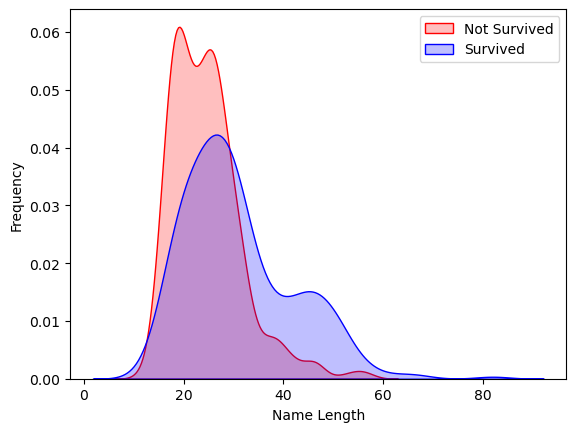

In [754]:
g = sns.kdeplot(train_df['Name Length'][(train_df['Survived']==0) & (train_df['Name Length'].notnull())], color='Red', fill=True)
g = sns.kdeplot(train_df['Name Length'][(train_df['Survived']==1) & (train_df['Name Length'].notnull())], ax=g, color='Blue', fill=True)
g.set_xlabel('Name Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])
plt.show()

In [755]:
train_df['Name Length GB'] = pd.qcut(train_df['Name Length'], 8)
test_df['Name Length GB'] = pd.qcut(test_df['Name Length'], 8)

In [756]:
train_df.groupby(['Name Length GB'], as_index=False) ['Survived'].mean()

C:\Users\amana\AppData\Local\Temp\ipykernel_19508\2573923420.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name Length GB'], as_index=False) ['Survived'].mean()


,Name Length GB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [757]:
train_df.loc[train_df['Name Length'] <=  18, 'Name Size'] = 0
train_df.loc[(train_df['Name Length'] > 18) & (train_df['Name Length'] <= 20), 'Name Size GB'] = 1
train_df.loc[(train_df['Name Length'] > 20) & (train_df['Name Length'] <= 23), 'Name Size GB'] = 2
train_df.loc[(train_df['Name Length'] > 23) & (train_df['Name Length'] <= 25), 'Name Size GB'] = 3
train_df.loc[(train_df['Name Length'] > 25) & (train_df['Name Length'] <= 27.25), 'Name Size GB'] = 4
train_df.loc[(train_df['Name Length'] > 27.25) & (train_df['Name Length'] <= 30), 'Name Size GB'] = 5
train_df.loc[(train_df['Name Length'] > 30) & (train_df['Name Length'] <= 38), 'Name Size GB'] = 6
train_df.loc[(train_df['Name Length'] > 38) & (train_df['Name Length'] <= 82), 'Name Size GB'] = 7
train_df.loc[train_df['Name Length'] > 82, 'Name Size']

test_df.loc[train_df['Name Length'] <=  18, 'Name Size'] = 0
test_df.loc[(train_df['Name Length'] > 18) & (test_df['Name Length'] <= 20), 'Name Size GB'] = 1
test_df.loc[(train_df['Name Length'] > 20) & (test_df['Name Length'] <= 23), 'Name Size GB'] = 2
test_df.loc[(train_df['Name Length'] > 23) & (test_df['Name Length'] <= 25), 'Name Size GB'] = 3
test_df.loc[(train_df['Name Length'] > 25) & (test_df['Name Length'] <= 27.25), 'Name Size GB'] = 4
test_df.loc[(train_df['Name Length'] > 27.25) & (test_df['Name Length'] <= 30), 'Name Size GB'] = 5
test_df.loc[(train_df['Name Length'] > 30) & (test_df['Name Length'] <= 38), 'Name Size GB'] = 6
test_df.loc[(train_df['Name Length'] > 38) & (test_df['Name Length'] <= 82), 'Name Size GB'] = 7
test_df.loc[train_df['Name Length'] > 82, 'Name Size']


Series([], Name: Name Size, dtype: float64)

In [758]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Family Size,Family Size Grouped,Age Cut,Fare cut,Title,Name Length,Name Length GB,Name Size,Name Size GB
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,...,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,5.0,...,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",NaN,7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,...,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Mr,22,"(20.0, 23.0]",NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,5.0,...,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mr,44,"(38.0, 82.0]",NaN,7.0
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,1.0,...,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mrs,24,"(23.0, 25.0]",NaN,3.0


In [759]:
train_df['Ticket Number'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['Ticket Number'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [760]:
train_df.groupby(['Ticket Number'] , as_index= False) ["Survived"].agg(['count', 'mean']).sort_values

<bound method DataFrame.sort_values of     Ticket Number  count      mean
0           10482      1  1.000000
1          110152      3  1.000000
2          110413      3  0.666667
3          110465      2  0.000000
4          110564      1  1.000000
..            ...    ...       ...
674          8475      1  0.000000
675           851      1  0.000000
676          9234      1  1.000000
677          9549      2  1.000000
678          LINE      4  0.250000

[679 rows x 3 columns]>

In [761]:
train_df.groupby('Ticket Number')['Ticket Number'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticket Number, Length: 891, dtype: int64

In [762]:
train_df['Ticket Number Counts'] = train_df.groupby('Ticket Number')['Ticket Number'].transform

In [763]:
train_df['Ticket Number Counts'] = train_df.groupby('Ticket Number')['Ticket Number'].transform('count')
test_df['Ticket Number Counts'] = test_df.groupby('Ticket Number')['Ticket Number'].transform('count')

In [764]:
train_df.groupby(['Ticket Number Counts'], as_index= False)['Survived'].agg(['count', 'mean']).sort_values('count')

,Ticket Number Counts,count,mean
4,5,10,0.000000
5,6,18,0.000000
6,7,21,0.238095
3,4,44,0.500000
2,3,66,0.712121
1,2,188,0.569149
0,1,544,0.295956


In [765]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [766]:
train_df['Ticket'].str.split(pat= ' ', expand= True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [767]:
train_df['TicketLocation'] = np.where(train_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), train_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [768]:
train_df['TicketLocation'].value_counts()

TicketLocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [769]:
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

test_df['TicketLocation'] = test_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

In [770]:
train_df.groupby(['TicketLocation'], as_index = False) ['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


In [771]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [772]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [773]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [774]:
train_df.groupby(['Cabin_Assigned'], as_index=False) ['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [775]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare cut,Title,Name Length,Name Length GB,Name Size,Name Size GB,Ticket Number,Ticket Number Counts,TicketLocation,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,...,"(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",NaN,2.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,5.0,...,"(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",NaN,7.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,...,"(7.775, 8.662]",Mr,22,"(20.0, 23.0]",NaN,2.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,5.0,...,"(52.369, 512.329]",Mr,44,"(38.0, 82.0]",NaN,7.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,1.0,...,"(7.775, 8.662]",Mrs,24,"(23.0, 25.0]",NaN,3.0,373450,1,Blank,0


In [776]:
train_df.shape
test_df.shape

(418, 23)

In [777]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           891 non-null    int64   
 1   Survived              891 non-null    int64   
 2   Pclass                891 non-null    int64   
 3   Name                  891 non-null    object  
 4   Sex                   891 non-null    object  
 5   Age                   714 non-null    float64 
 6   SibSp                 891 non-null    int64   
 7   Parch                 891 non-null    int64   
 8   Ticket                891 non-null    object  
 9   Fare                  891 non-null    float64 
 10  Cabin                 891 non-null    object  
 11  Embarked              889 non-null    object  
 12  Family Size           891 non-null    int64   
 13  Family Size Grouped   891 non-null    object  
 14  Age Cut               714 non-null    category
 15  Fare c

In [778]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)
train_df['Fare'].fillna(train_df['Fare'].mean(), inplace = True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

C:\Users\amana\AppData\Local\Temp\ipykernel_19508\497043209.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)
C:\Users\amana\AppData\Local\Temp\ipykernel_19508\497043209.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [779]:
ohe = OneHotEncoder(sparse_output= False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy= 'most_frequent')

In [780]:
ode_cols = ['Family_size_grouped']
ohe_cols = ['Sex', 'Embarked']

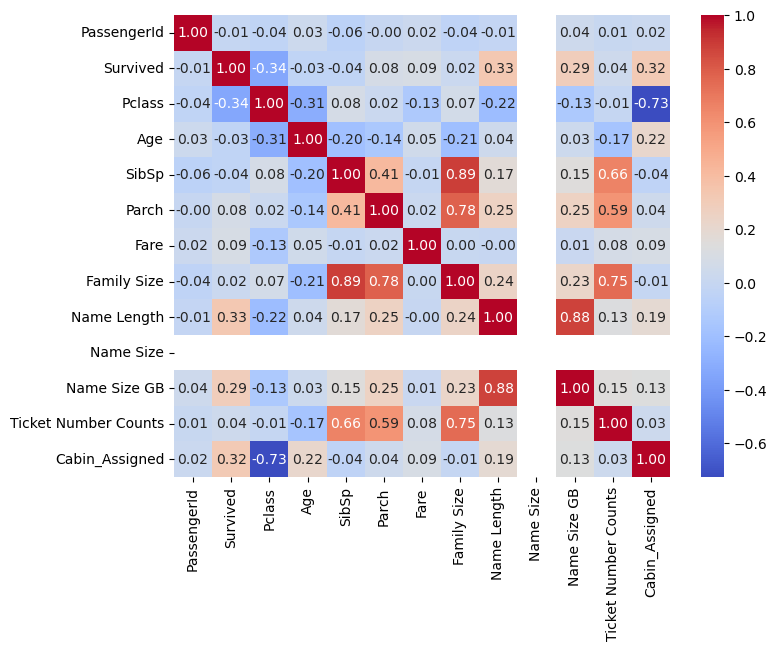

In [781]:
correlation_matrix = train_df.corr(numeric_only=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [782]:
#new
X = train_df.drop(['Survived', 'SibSp', 'Parch'], axis=1)
y = train_df['Survived']
X_test = test_df.drop(['Age Cut', 'Fare Cut', 'SibSp', 'Parch'], axis=1)

In [783]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify = y, random_state=21)

In [784]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [785]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

In [786]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
   # ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name Size', 'Age', 'Fare'])
     ('passthrough', 'passthrough', ['Pclass', 'Cabin_Assigned', 'Name Size', 'Age', 'Fare', 'TicketNumberCounts'])
    ],
    remainder='drop',
    n_jobs=-1)

In [787]:
rfc = RandomForestClassifier()

In [788]:
param_grid = {
    'n_estimators' :[150,200,300,500],
    'min_samples_split' :[5,10,15],
    'max_depth' : [10,13,15,17,20],
    'min_sample_leaf' : [2,4,5,6], 
    'criteriion' : ['gini', 'entropy']
}

In [789]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [790]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [708]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           891 non-null    int64   
 1   Survived              891 non-null    int64   
 2   Pclass                891 non-null    int64   
 3   Name                  891 non-null    object  
 4   Sex                   891 non-null    object  
 5   Age                   891 non-null    float64 
 6   SibSp                 891 non-null    int64   
 7   Parch                 891 non-null    int64   
 8   Ticket                891 non-null    object  
 9   Fare                  891 non-null    float64 
 10  Cabin                 891 non-null    object  
 11  Embarked              889 non-null    object  
 12  Family Size           891 non-null    int64   
 13  Family Size Grouped   891 non-null    object  
 14  Age Cut               714 non-null    category
 15  Fare c

In [792]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [795]:
dtc = DecisionTreeClassifier()


In [796]:
param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

NameError: name 'CV_dtc' is not defined

In [799]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))


In [801]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe